<a href="https://colab.research.google.com/github/Hari-Shankar99/Linear-Regression-applied-for-Cancer-Rate/blob/main/Linear_Regression_DAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
import missingno as msno
import seaborn
import warnings
warnings.filterwarnings('ignore')

#Reading and Merging

In [ ]:
cols = list(pd.read_excel("/content/merged_data.xlsx", nrows =1))
cols = cols[1:]
cols.remove('fips_y')
cols.remove('fips_x')
my_cols = ['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic',
           'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend_incd', 'Mortality_Rate', 'Avg_Deaths']

In [ ]:
df = pd.read_excel('/content/merged_data.xlsx', index_col=5, usecols = cols)
df.columns = my_cols

Merging The recent_trend_deaths

In [ ]:
df_recent_trend_death = pd.read_excel('/content/death .xlsx',index_col = 1)
df = pd.merge(df,df_recent_trend_death['Recent Trend (2)'],how='outer',on='FIPS')
df.dropna(axis=0,subset=['State'],inplace=True)
mycols = list(df.columns)[:-1]
mycols.append('recent_trend_deaths')
df.columns = mycols


In [ ]:
df.loc[(df['Incidence_Rate'].isin(['*','_','__'])),['Incidence_Rate']] = np.nan
df.loc[(df['Mortality_Rate'].isin(['*','_','__'])),['Mortality_Rate']] = np.nan
df.loc[(df['Avg_Ann_Incidence'].isin(['*','_','__'])),['Avg_Ann_Incidence']] = np.nan
df.loc[(df['Avg_Deaths'].isin(['*','_','__'])),['Avg_Deaths']] = np.nan

clearing the values like 66.0 #, 54.8 #

In [ ]:
def clear_cell(x):
  if isinstance(x,str):
    return float(x[:-2])
  else:
    return x
df.Incidence_Rate = df.Incidence_Rate.apply(clear_cell)

#check if any string
for k in df.Incidence_Rate:
 if isinstance(k,str):
   print(k)

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing= missing_values_table(df)
missing

Dataframe has 23 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Med_Income_Asian,1757,56.1
Med_Income_Nat_Am,1660,53.0
Med_Income_Black,1210,38.6
Hispanic,681,21.7
Incidence_Rate,420,13.4
Mortality_Rate,325,10.4
Avg_Deaths,325,10.4
Avg_Ann_Incidence,209,6.7
Med_Income_White,2,0.1
Med_Income,1,0.0


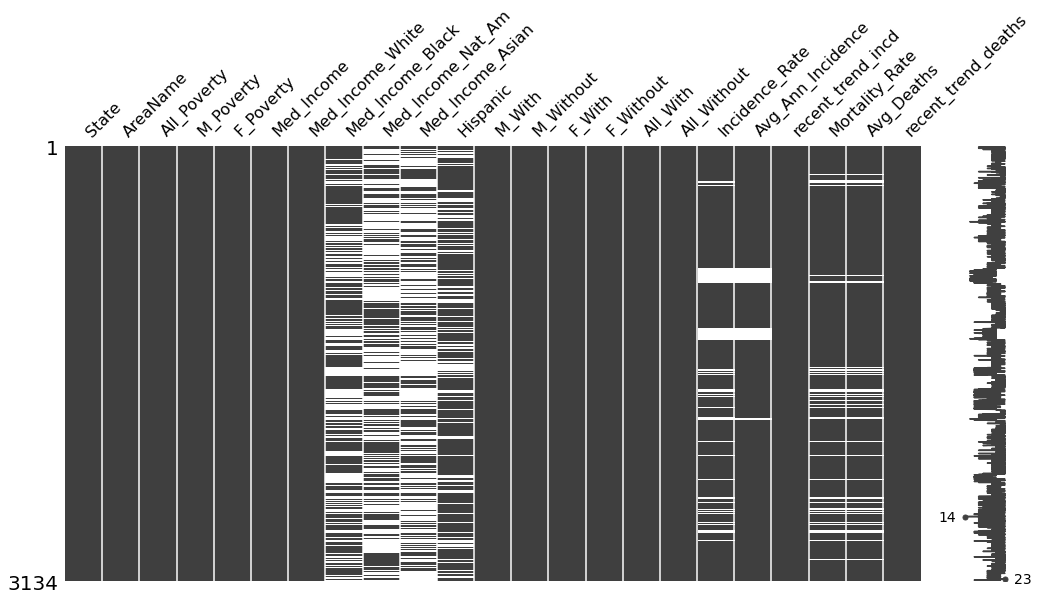

In [ ]:
_ = msno.matrix(df,figsize = (17,8)) # white spaces shows the missing cells

In [ ]:
print('No. of counties with 3 or fewer avg_ann_incd =',df[df['Avg_Ann_Incidence']=='3 or fewer'].Avg_Ann_Incidence.count())

No. of counties with 3 or fewer avg_ann_incd = 211


In [ ]:
x_features = mycols[2:-6] 
y_features = mycols[-6:]
y_features.remove('recent_trend_incd')
y_features.remove('recent_trend_deaths')
for k in ['All_Poverty','All_With','All_Without']:
  x_features.remove(k)
df_final = df.copy()

In [ ]:
print('Ys',y_features)
print('Xs',x_features)

Ys ['Incidence_Rate', 'Avg_Ann_Incidence', 'Mortality_Rate', 'Avg_Deaths']
Xs ['M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With', 'M_Without', 'F_With', 'F_Without']


In [ ]:
dft = df[y_features].copy()
dft.loc[dft['Avg_Ann_Incidence']=='3 or fewer',['Avg_Ann_Incidence']] = 2
dft1 = df.copy()
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impy = IterativeImputer(max_iter=10, random_state=0)
impy.fit(dft)
dft1[y_features] = impy.transform(dft)
df_final[y_features] = dft1[y_features]
missing= missing_values_table(df_final)
missing

Dataframe has 23 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Med_Income_Asian,1757,56.1
Med_Income_Nat_Am,1660,53.0
Med_Income_Black,1210,38.6
Hispanic,681,21.7
Med_Income_White,2,0.1
Med_Income,1,0.0


In [ ]:
dft = df[x_features].copy()
dft1 = df.copy()
impx = IterativeImputer(max_iter=10, random_state=0)
impx.fit(dft)
dft1[x_features] = impx.transform(dft)
df_final[x_features] = dft1[x_features]
missing= missing_values_table(df_final)
missing


Dataframe has 23 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
df_final.to_csv('df_final.csv')

In [ ]:
df_final1 = df_final[x_features+y_features]

Covariance Visualization

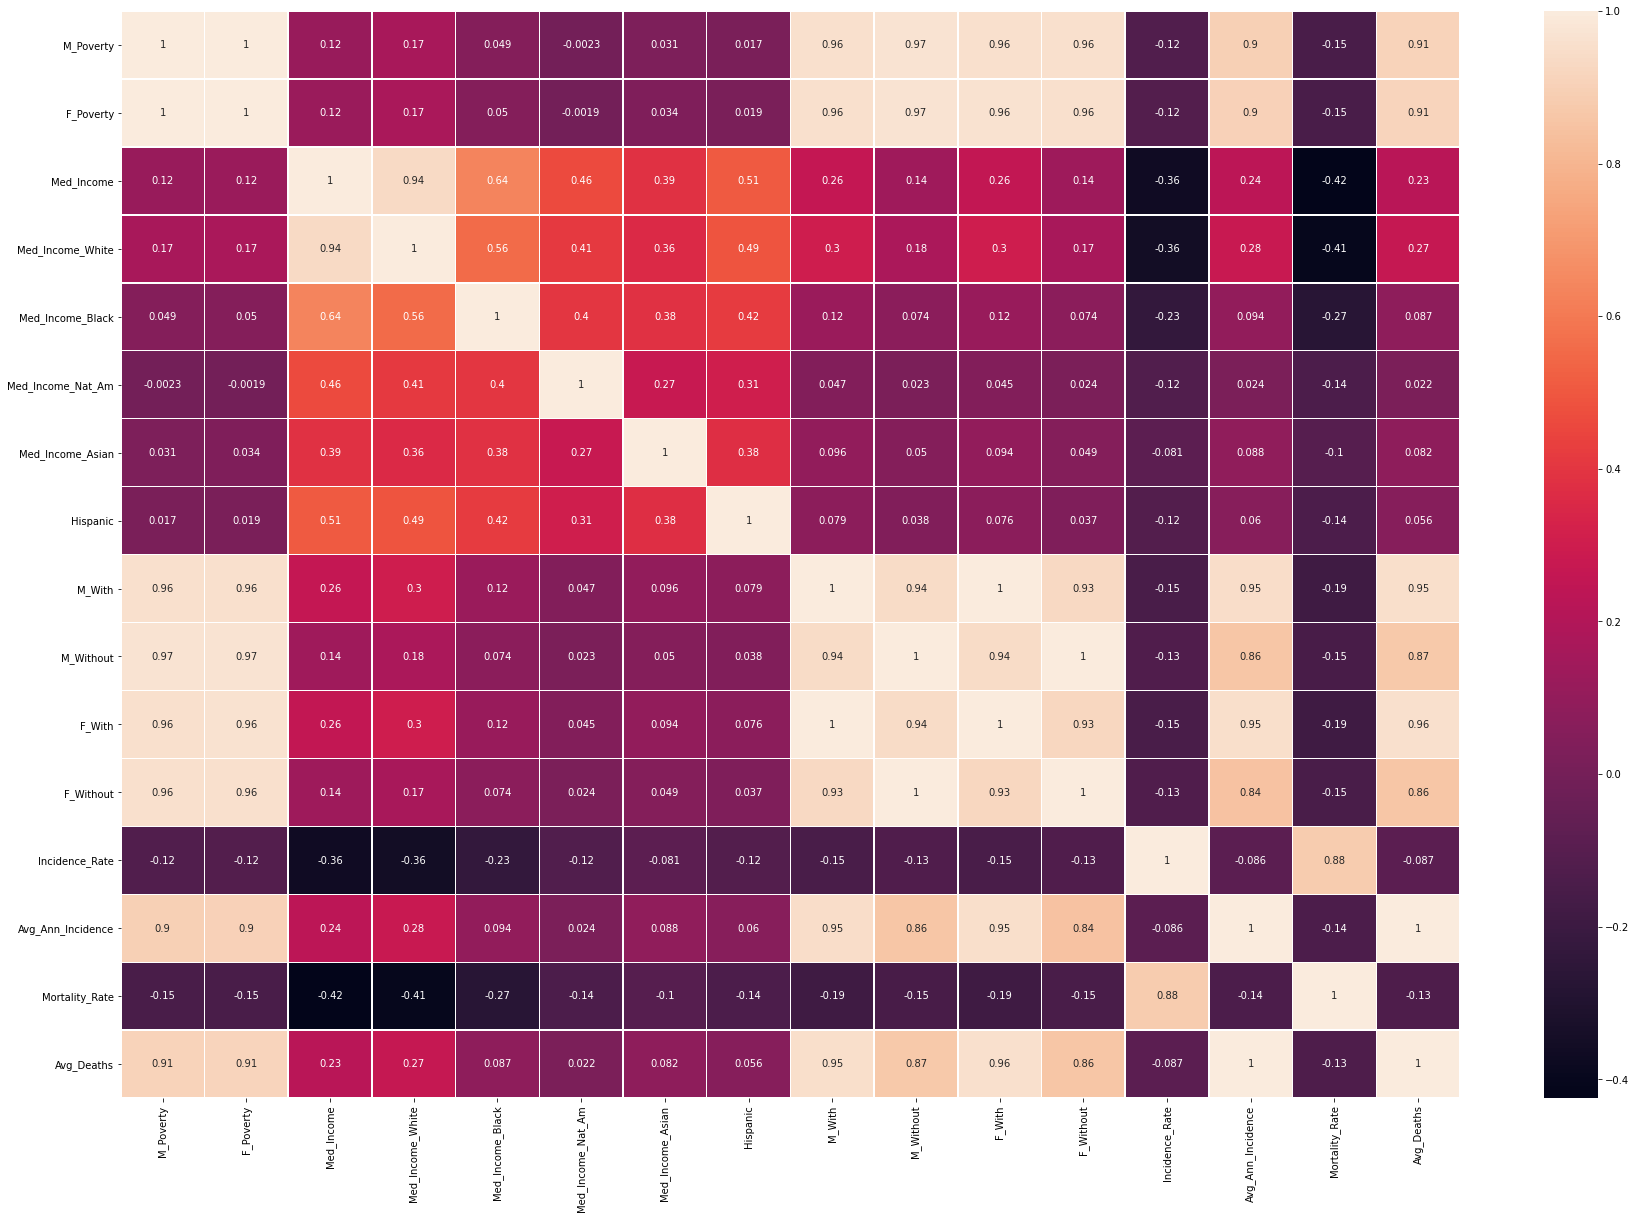

In [ ]:
fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches
seaborn.heatmap(df_final1.corr(), annot=True, linewidths=.5, ax=ax)

#Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
X = train.loc[:, x_features].values.reshape(-1, len(x_features)) 
Y = train.loc[:, y_features].values.reshape(-1, len(y_features)) 
X_test = test.loc[:, x_features].values.reshape(-1, len(x_features)) 
linear_regressor = LinearRegression(normalize=True)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X_test) 

In [ ]:
Y_test = test.loc[:, y_features].values.reshape(-1, len(y_features))
rmse = ((Y_pred - Y_test)**2).mean(axis =0)**0.5
rmse = pd.DataFrame(rmse.reshape((1,-1)),columns = y_features,index=['RMSE'])
print('RMSE for the predicted values: \n')
rmse

RMSE for the predicted values: 



,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Deaths
RMSE,14.530005,47.563618,11.686365,31.489834


In [ ]:
test.loc[list(test.index.values),[s + '_pred' for s in y_features]] = Y_pred

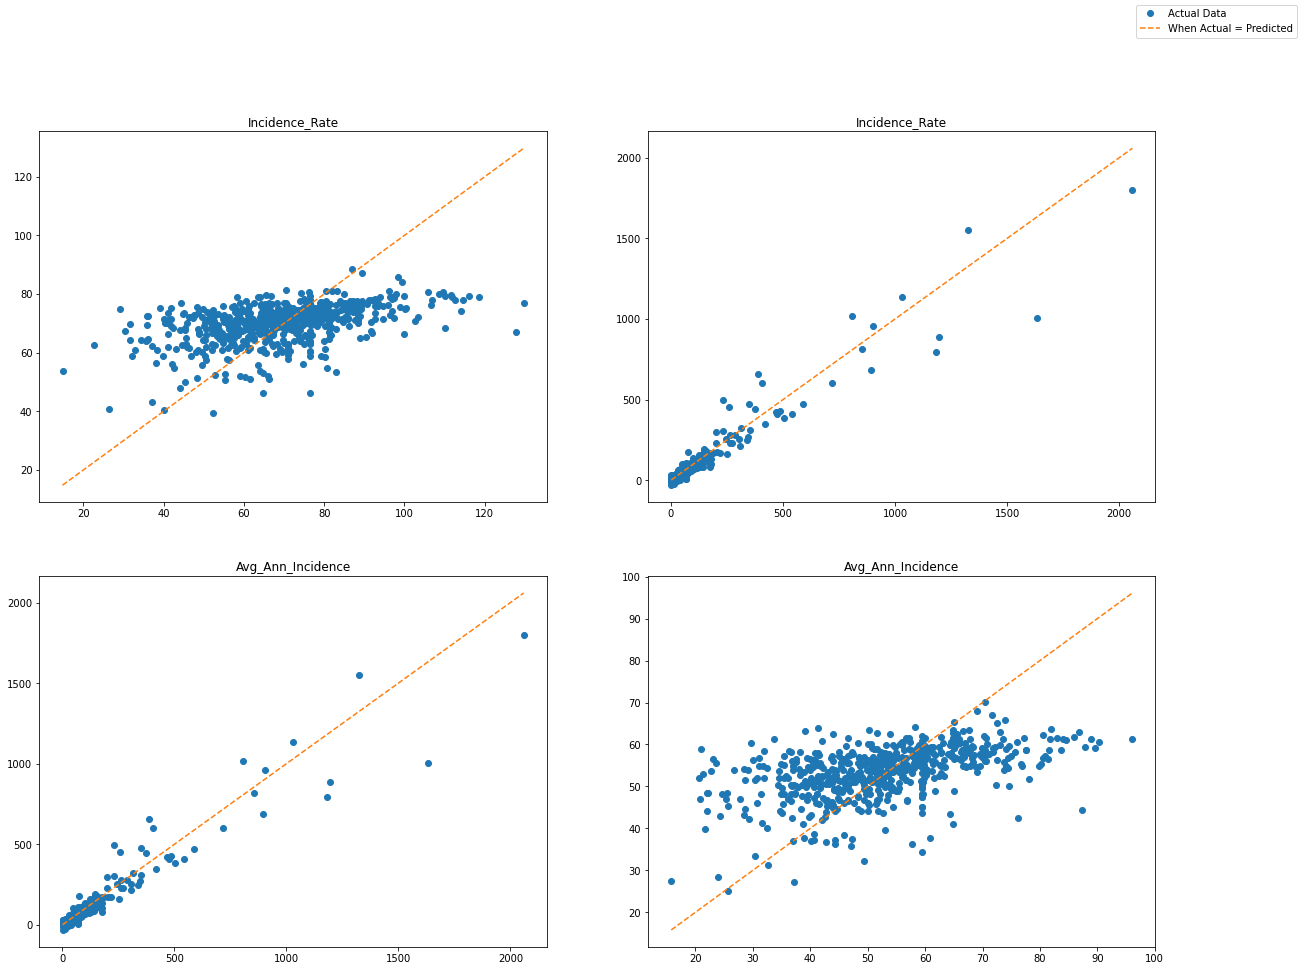

In [ ]:
fig,axs = plt.subplots(2,2,figsize=(20,15))
for i in range(2):
  for j in range(2):
    test = test.sort_values(by=[y_features[i+j]])
    axs[i,j].plot(test[y_features[i+j]],test[y_features[i+j]+'_pred'],'o',label = 'Actual Data')
    axs[i,j].plot(test[y_features[i+j]],test[y_features[i+j]],'--',label = 'When Actual = Predicted')
    axs[i,j].title.set_text(y_features[i])

lines = []
labels = []
Line, Label = axs[0,0].get_legend_handles_labels()
lines.extend(Line)
labels.extend(Label)
fig.legend(lines, labels, loc='upper right')
plt.show()

Coeff of the LR

In [ ]:
all_coeff = np.abs(linear_regressor.coef_)
df_coeffs = pd.DataFrame(all_coeff,columns = x_features,index = y_features)

for k in range(len(y_features)):
  df_i = df_coeffs.loc[[y_features[k]]]
  df_i = df_i.sort_values(by = [y_features[k]], axis = 1,ascending=False)
  display(df_i.style.background_gradient(cmap ='coolwarm',axis=1))
  print('\n')

,M_Poverty,F_Poverty,F_Without,M_Without,Med_Income,Med_Income_White,Hispanic,Med_Income_Nat_Am,M_With,Med_Income_Asian,F_With,Med_Income_Black
Incidence_Rate,0.001422,0.000997,0.000513,0.000459,0.000411,0.000242,0.000093,0.000056,0.000052,0.000030,0.000020,0.000018


,M_Without,F_Without,F_With,M_With,M_Poverty,F_Poverty,Med_Income_White,Med_Income,Med_Income_Black,Med_Income_Nat_Am,Hispanic,Med_Income_Asian
Avg_Ann_Incidence,0.009853,0.009186,0.005721,0.004303,0.003154,0.001557,0.001138,0.000695,0.000206,0.000071,0.000033,0.000013


,M_Poverty,F_Poverty,F_Without,M_Without,Med_Income,Med_Income_White,Hispanic,M_With,F_With,Med_Income_Nat_Am,Med_Income_Asian,Med_Income_Black
Mortality_Rate,0.001025,0.000682,0.000585,0.000578,0.000503,0.000086,0.000080,0.000074,0.000057,0.000050,0.000022,0.000004


,M_Without,F_Without,F_With,M_With,F_Poverty,Med_Income_White,Med_Income,M_Poverty,Med_Income_Black,Hispanic,Med_Income_Nat_Am,Med_Income_Asian
Avg_Deaths,0.006336,0.005905,0.004041,0.003079,0.000888,0.000765,0.000424,0.000381,0.000169,0.000032,0.000032,0.000009


#Trend in Deaths

In [ ]:
from sklearn.model_selection import train_test_split
df1 = df_final[df_final['recent_trend_deaths'].isin(['falling', 'stable', 'rising'])]
print('Percentage of states with rising trend =  %2f ' %(df1[df1['recent_trend_deaths']=='rising']['recent_trend_deaths'].shape[0]/df1.shape[0]*100))
train, test = train_test_split(df1, test_size=0.2,stratify = df1['recent_trend_deaths'])

Percentage of states with rising trend =  1.151560 


In [ ]:
print(train.recent_trend_deaths.value_counts())
train.loc[train['recent_trend_deaths'].isin(['falling']),'recent_trend_deaths'] = 1
train.loc[train['recent_trend_deaths'].isin(['stable']),'recent_trend_deaths'] = -1
train.drop(train[train['recent_trend_deaths'].isin(['rising'])].index, inplace = True)

stable     1435
falling     693
rising       25
Name: recent_trend_deaths, dtype: int64


In [ ]:
print(test.recent_trend_deaths.value_counts())
test.loc[test['recent_trend_deaths'].isin(['falling']),'recent_trend_deaths'] = 1
test.loc[test['recent_trend_deaths'].isin(['stable']),'recent_trend_deaths'] = -1
test.drop(test[test['recent_trend_deaths'].isin(['rising'])].index, inplace = True)
Y_test = test.loc[:, ['recent_trend_deaths']].values.reshape(-1, 1)

stable     360
falling    173
rising       6
Name: recent_trend_deaths, dtype: int64


In [ ]:
def accu_score(Y_test,Y_pred):
  accuracy = 0
  for k in range(len(Y_pred)):
    if Y_pred[k] == Y_test[k]:
      accuracy+=1
  accuracy = accuracy / len(Y_pred) * 100
  print('accuracy = ',accuracy)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
X = train.loc[:, x_features].values.reshape(-1, len(x_features)) 
Y = train.loc[:, ['recent_trend_deaths']].values.reshape(-1, 1) 
X_test = test.loc[:, x_features].values.reshape(-1, len(x_features)) 
linear_regressor = LinearRegression(normalize = True)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X_test) 
Y_pred = np.sign(Y_pred) 
accu_score(Y_test,Y_pred)

accuracy =  77.86116322701689


In [ ]:
all_coeff = np.abs(linear_regressor.coef_)
df_coeffs = pd.DataFrame(all_coeff,columns = x_features,index = ['recent_trend_deaths'])
df_coeffs = df_coeffs.sort_values(by = ['recent_trend_deaths'], axis = 1,ascending=False)
display(df_coeffs.style.background_gradient(cmap ='coolwarm',axis=1))
print('\n')

,M_Without,F_Without,Med_Income_White,F_Poverty,M_Poverty,F_With,Hispanic,M_With,Med_Income,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian
recent_trend_deaths,0.000093,0.000090,0.000026,0.000015,0.000008,0.000005,0.000002,0.000002,0.000001,0.000001,0.000000,0.000000


#Trend in Incidence

In [ ]:
from sklearn.model_selection import train_test_split
df1 = df_final[df_final['recent_trend_incd'].isin(['falling', 'stable', 'rising'])]
print('Percentage of states with rising trend =  %2f ' %(df1[df1['recent_trend_deaths']=='rising']['recent_trend_deaths'].shape[0]/df1.shape[0]*100))
train, test = train_test_split(df1, test_size=0.2,stratify = df1['recent_trend_incd'])

Percentage of states with rising trend =  0.974878 


In [ ]:
print(train.recent_trend_incd.value_counts())
train.loc[train['recent_trend_incd'].isin(['falling']),'recent_trend_incd'] = 1
train.loc[train['recent_trend_incd'].isin(['stable']),'recent_trend_incd'] = -1
train.drop(train[train['recent_trend_incd'].isin(['rising'])].index, inplace = True)

stable     1940
falling     158
rising       35
Name: recent_trend_incd, dtype: int64


In [ ]:
print(test.recent_trend_incd.value_counts())
test.loc[test['recent_trend_incd'].isin(['falling']),'recent_trend_incd'] = 1
test.loc[test['recent_trend_incd'].isin(['stable']),'recent_trend_incd'] = -1
test.drop(test[test['recent_trend_incd'].isin(['rising'])].index, inplace = True)
Y_test = test.loc[:, ['recent_trend_incd']].values.reshape(-1, 1)

stable     486
falling     40
rising       8
Name: recent_trend_incd, dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
X = train.loc[:, x_features].values.reshape(-1, len(x_features)) 
Y = train.loc[:, ['recent_trend_incd']].values.reshape(-1, 1) 
X_test = test.loc[:, x_features].values.reshape(-1, len(x_features)) 
linear_regressor = LinearRegression(normalize=True)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X_test) 
Y_pred = np.sign(Y_pred) 
accu_score(Y_test,Y_pred)

accuracy =  93.15589353612167


In [ ]:
all_coeff = np.abs(linear_regressor.coef_)
df_coeffs = pd.DataFrame(all_coeff,columns = x_features,index = ['recent_trend_incd'])
df_coeffs = df_coeffs.sort_values(by = ['recent_trend_incd'], axis = 1,ascending=False)
display(df_coeffs.style.background_gradient(cmap ='coolwarm',axis=1))
print('\n')

,M_Poverty,M_Without,F_Poverty,F_Without,F_With,M_With,Med_Income_White,Med_Income_Black,Med_Income,Med_Income_Nat_Am,Hispanic,Med_Income_Asian
recent_trend_incd,0.000028,0.000026,0.000026,0.000026,0.000012,0.000010,0.000002,0.000002,0.000002,0.000001,0.000001,0.000000


#Visualization

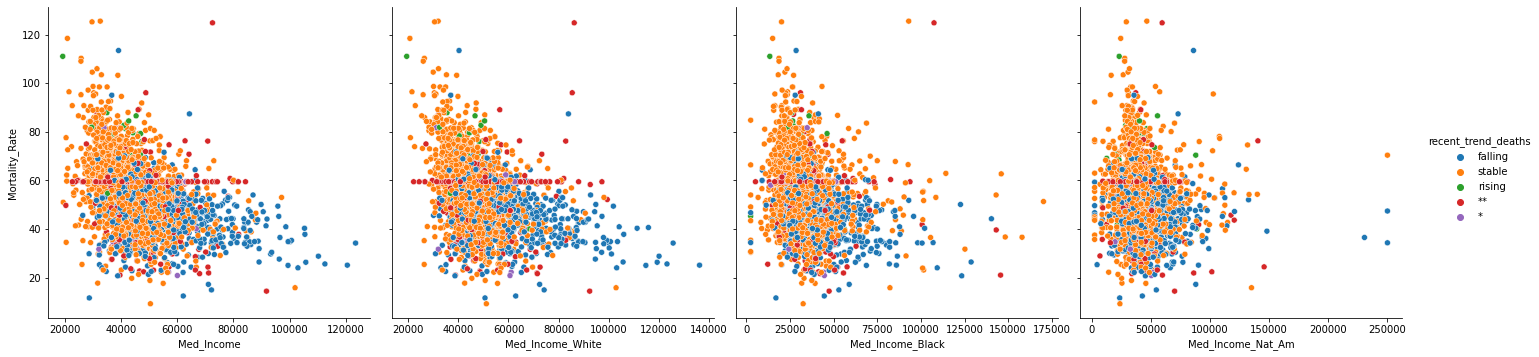

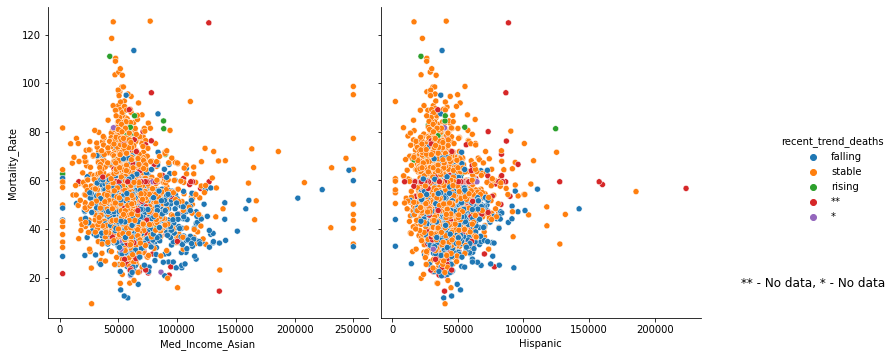

In [ ]:
seaborn.pairplot(df_final, x_vars = ['Med_Income','Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am'], y_vars = ['Mortality_Rate'],hue ='recent_trend_deaths',
                     hue_order=['falling','stable','rising','**','*'],height = 5,aspect=1)
p = seaborn.pairplot(df_final, x_vars = ['Med_Income_Asian', 'Hispanic'], y_vars = ['Mortality_Rate'],hue ='recent_trend_deaths',
                     hue_order=['falling','stable','rising','**','*'],height = 5,aspect=1)
p.fig.text(0.9, 0.2, '** - No data, * - No data', ha ='left', fontsize = 12)
plt.show()

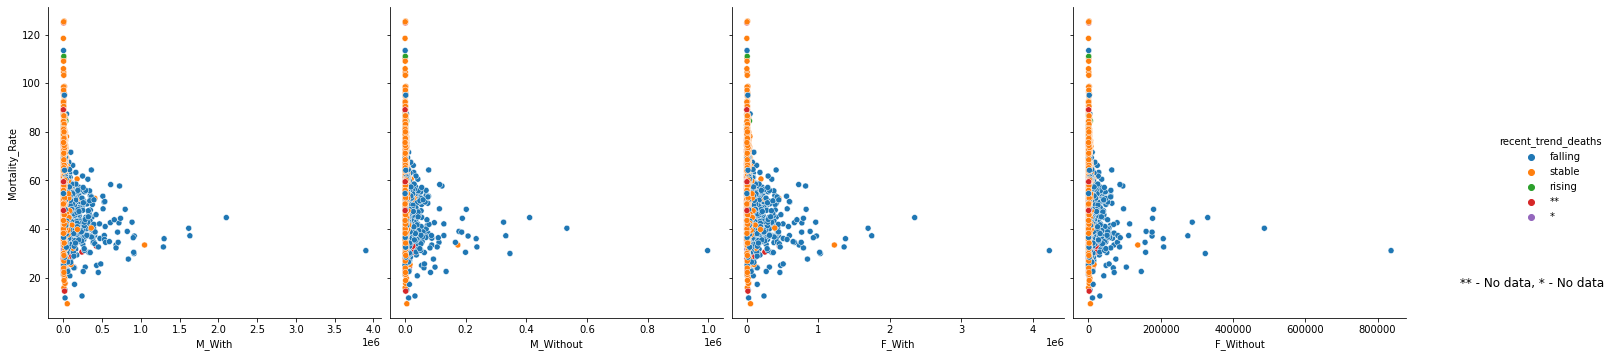

In [ ]:
p = seaborn.pairplot(df_final, x_vars = ['M_With', 'M_Without', 'F_With', 'F_Without'], y_vars = ['Mortality_Rate'],hue ='recent_trend_deaths',
                     hue_order=['falling','stable','rising','**','*'],height = 5,aspect=1)

p.fig.text(0.95, 0.2, '** - No data, * - No data', ha ='left', fontsize = 12)

plt.show()

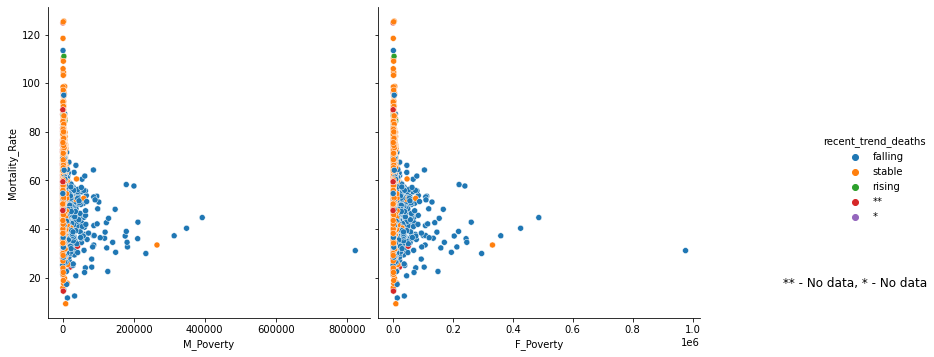

In [ ]:
p = seaborn.pairplot(df_final, x_vars = ['M_Poverty', 'F_Poverty'], y_vars = ['Mortality_Rate'],hue ='recent_trend_deaths',
                     hue_order=['falling','stable','rising','**','*'],height = 5,aspect=1)
p.fig.text(0.95, 0.2, '** - No data, * - No data', ha ='left', fontsize = 12)
plt.show()

In [ ]:
drop_index = df_final[df_final['recent_trend_incd'].isin(['__','_','*'])].index
df_final.drop(index = drop_index,axis = 0,inplace=True)


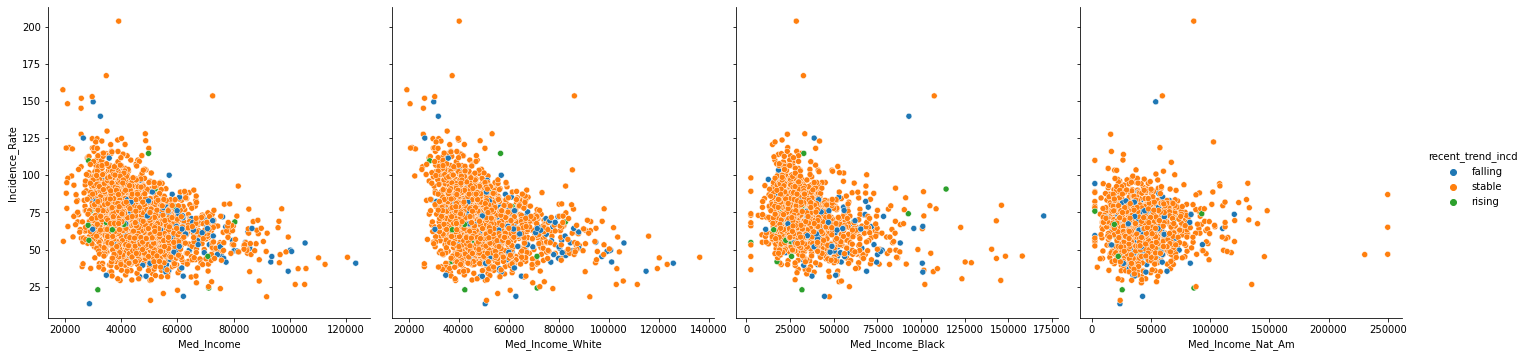

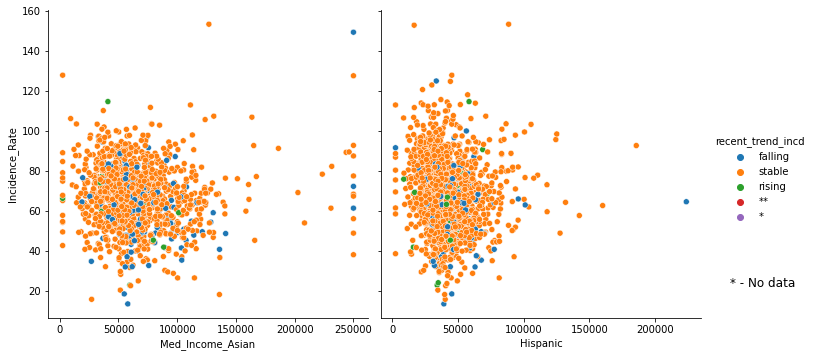

In [ ]:
seaborn.pairplot(df_final, x_vars = ['Med_Income','Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am'], y_vars = ['Incidence_Rate'],hue ='recent_trend_incd',
                     hue_order=['falling','stable','rising'],height = 5,aspect=1)
p = seaborn.pairplot(df_final, x_vars = ['Med_Income_Asian', 'Hispanic'], y_vars = ['Incidence_Rate'],hue ='recent_trend_incd',
                     hue_order=['falling','stable','rising','**','*'],height = 5,aspect=1)
p.fig.text(0.9, 0.2, '* - No data', ha ='left', fontsize = 12)
plt.show()

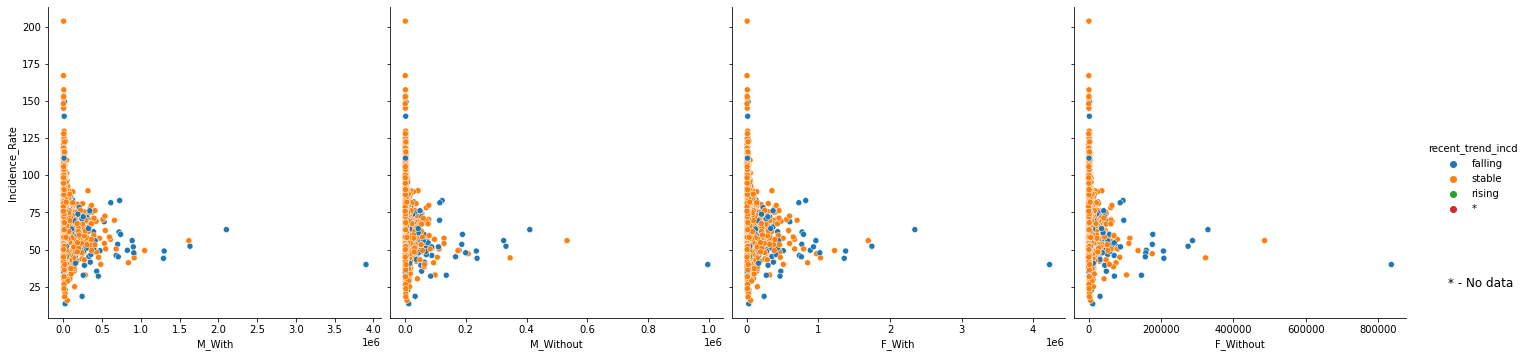

In [ ]:
p = seaborn.pairplot(df_final, x_vars = ['M_With', 'M_Without', 'F_With', 'F_Without'], y_vars = ['Incidence_Rate'],hue ='recent_trend_incd',
                     hue_order=['falling','stable','rising','*'],height = 5,aspect=1)

p.fig.text(0.95, 0.2, '* - No data', ha ='left', fontsize = 12)
plt.show()

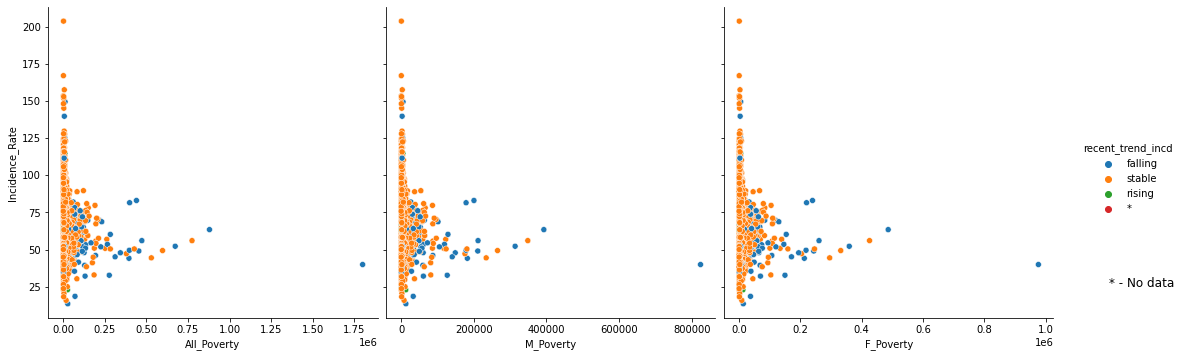

In [ ]:
p = seaborn.pairplot(df_final, x_vars = ['All_Poverty', 'M_Poverty', 'F_Poverty'], y_vars = ['Incidence_Rate'],hue ='recent_trend_incd',
                     hue_order=['falling','stable','rising','*'],height = 5,aspect=1)
p.fig.text(0.95, 0.2, '* - No data', ha ='left', fontsize = 12)
plt.show()